In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,3:].values

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Building Hierarchial cluster

Text(0, 0.5, 'Euclidian distance')

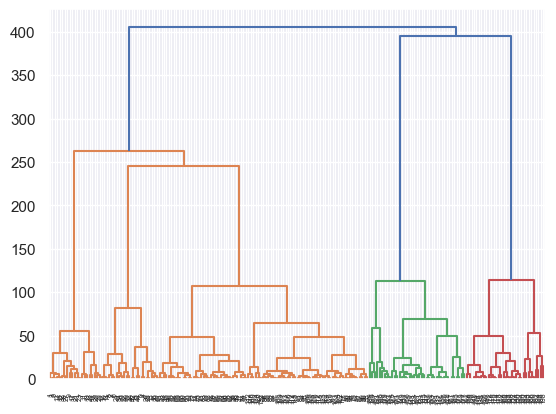

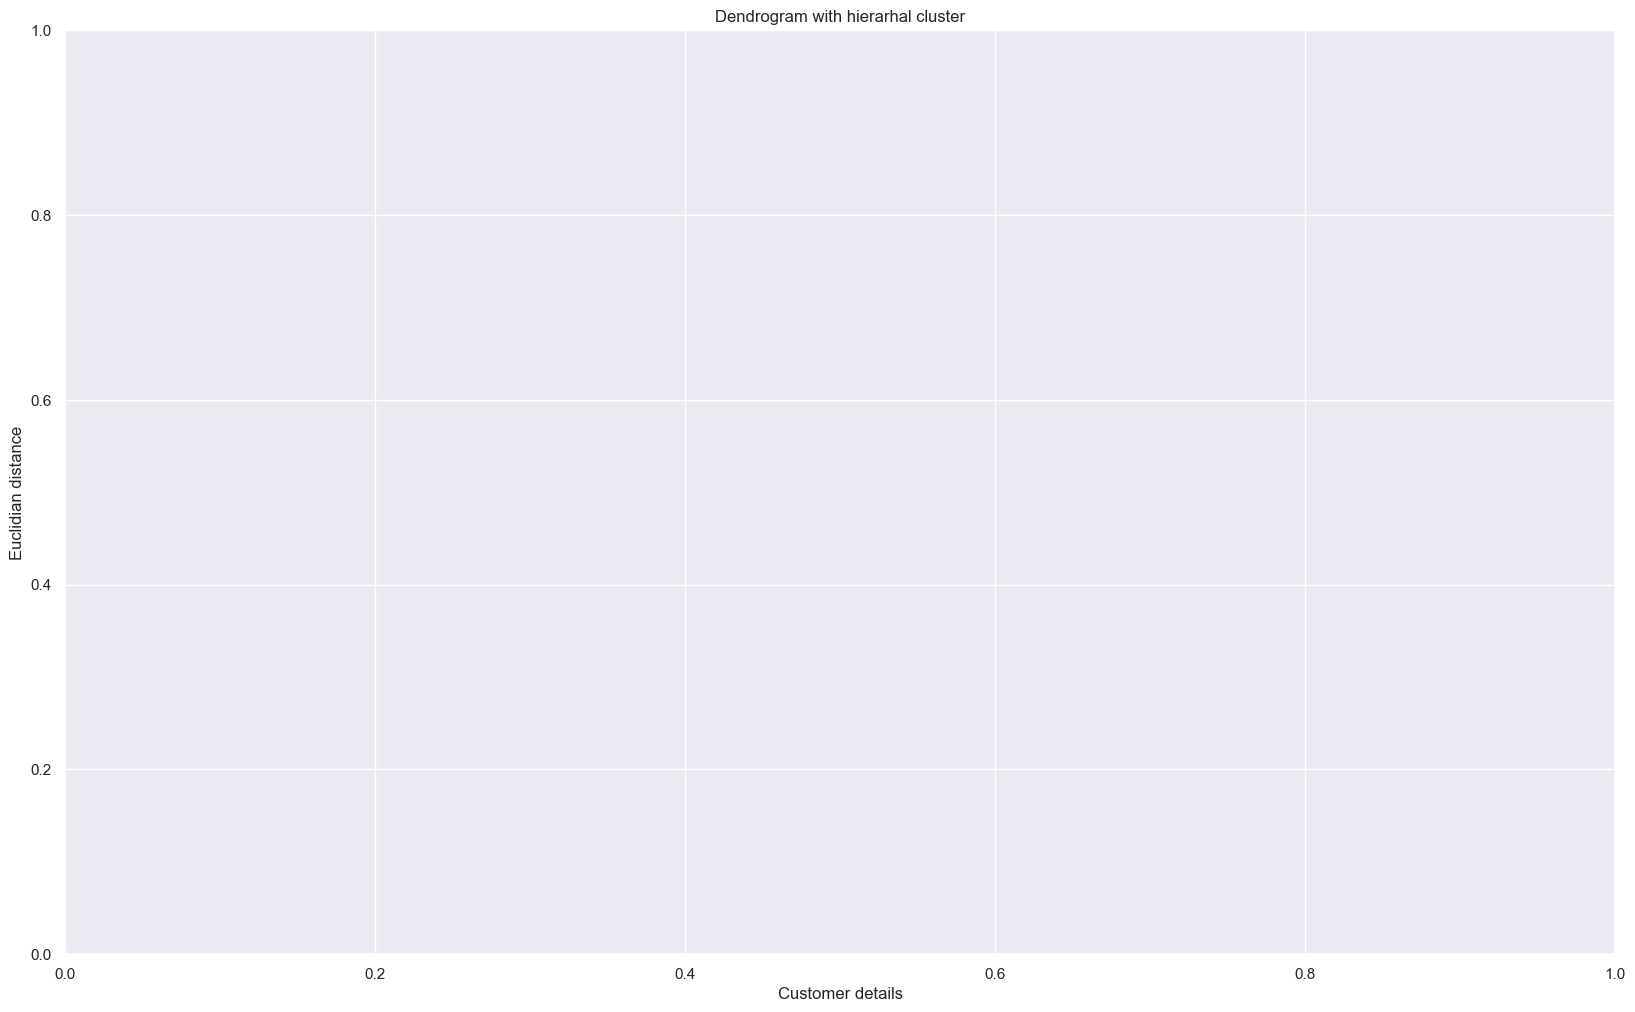

In [8]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.figure(figsize=(20,12))
plt.title("Dendrogram with hierarhal cluster")
plt.xlabel('Customer details')
plt.ylabel("Euclidian distance")


In [9]:
from sklearn.cluster import AgglomerativeClustering

hcluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [10]:
y_hcluster = hcluster.fit_predict(sc_x)
y_hcluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [11]:
combined_cluster = pd.concat([df, pd.DataFrame(y_hcluster)], axis=1)
combined_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


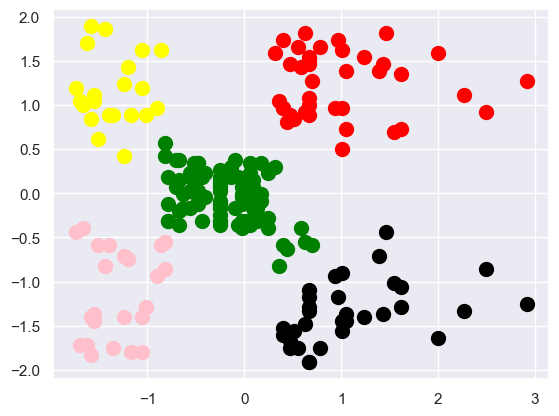

In [12]:
# Visualization

plt.scatter(sc_x[y_hcluster==0,0], sc_x[y_hcluster==0,1], s=100, c='black', label='H_Cluster1')
plt.scatter(sc_x[y_hcluster==1,0], sc_x[y_hcluster==1,1], s=100, c='red', label='H_Cluster2')
plt.scatter(sc_x[y_hcluster==2,0], sc_x[y_hcluster==2,1], s=100, c='green', label='H_Cluster3')
plt.scatter(sc_x[y_hcluster==3,0], sc_x[y_hcluster==3,1], s=100, c='yellow', label='H_Cluster4')
plt.scatter(sc_x[y_hcluster==4,0], sc_x[y_hcluster==4,1], s=100, c='pink', label='H_Cluster5')
plt.show()

# DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

In [15]:
x = np.array([[1,2], [3,4], [8,9], [7,8], [50,90]])
x

array([[ 1,  2],
       [ 3,  4],
       [ 8,  9],
       [ 7,  8],
       [50, 90]])

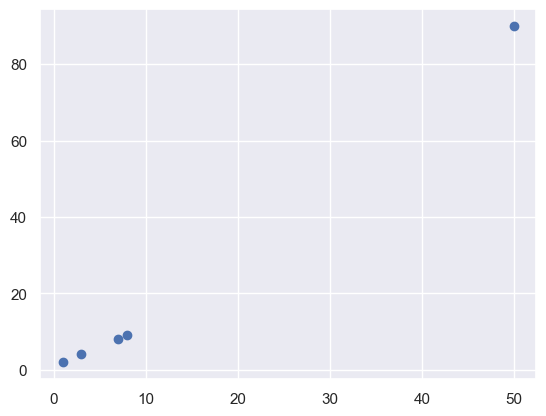

In [16]:
plt.scatter(x[:,0], x[:,1])

In [17]:
clustering = DBSCAN(eps=0.5, min_samples=4).fit_predict(x)
clustering

#Getting negative values = outliers present

array([-1, -1, -1, -1, -1])

In [18]:
clustering = DBSCAN(eps=3, min_samples=4).fit_predict(x)
clustering

array([-1, -1, -1, -1, -1])